Metodologia a usar:
- CRISP-DM

Intengrantes:
- Jehu Aravena
- Nicolas Montecinos

In [3]:
from tensorflow import keras
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

### CRISP-DM
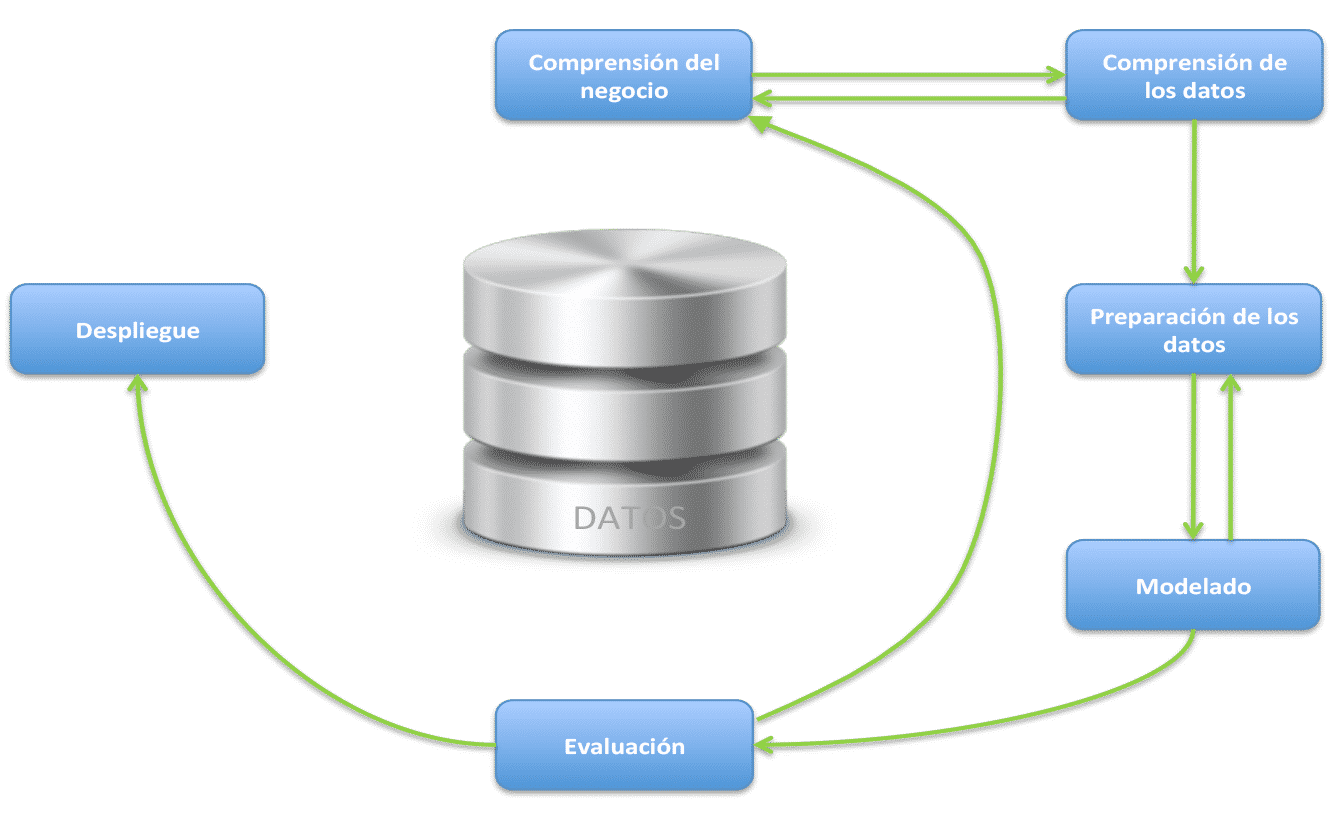

# Comprensión del negocio

El Gobierno de Chile busca implementar inteligencia artificial en su página web mediante el etiquetado de imágenes de distintos dominios. El objetivo principal del proyecto es seleccionar y clasificar imágenes, detectar objetos, estados de ánimo y rostros. Para lograr esto, se utilizarán técnicas de inteligencia artificial, como el Aprendizaje Automático, que permite a las computadoras aprender y generalizar patrones a partir de conocimiento previo.

Dentro del Aprendizaje Automático, se empleará el Aprendizaje Activo para mejorar la precisión y el rendimiento de los modelos de predicción. En este caso, se utilizará el conjunto de datos CIFAR-10, el cual consta de 60,000 imágenes en color de 32x32 píxeles, distribuidas en 10 clases con 6,000 imágenes por clase. Hay 50,000 imágenes para entrenamiento y 10,000 imágenes para pruebas. El conjunto de datos se divide en cinco lotes de entrenamiento y un lote de prueba, con 1,000 imágenes seleccionadas al azar de cada clase en el lote de prueba. Los lotes de entrenamiento contienen las imágenes restantes, con exactamente 5,000 imágenes de cada clase, aunque algunos lotes pueden tener más imágenes de una clase que de otra.

# Comprensión de los datos

El siguiente código carga el conjunto de datos CIFAR-10 y muestra una cuadrícula de imágenes de prueba. Cada imagen se etiqueta con su clase correspondiente, representada por un título en la cuadrícula. Se utilizan funciones de la biblioteca matplotlib.pyplot para configurar la visualización, como desactivar las divisiones de ejes y ocultar las etiquetas de los ejes. La cuadrícula de imágenes proporciona una representación visual de las muestras del conjunto de datos CIFAR-10, lo que permite una comprensión rápida de las imágenes y sus etiquetas.

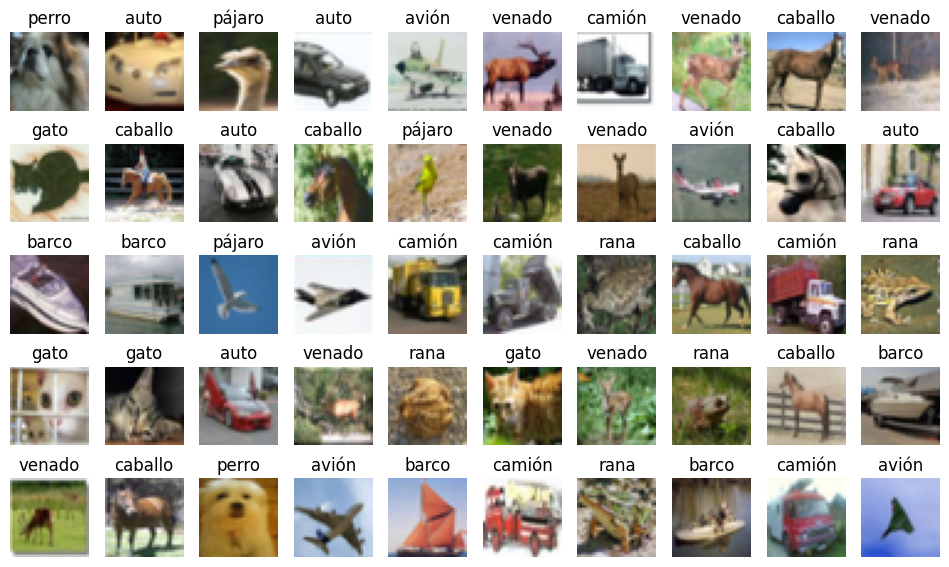

In [4]:
(imgs_train,labs_train), (imgs_test,labs_test) = keras.datasets.cifar10.load_data() # carga de datos

nombres = ['avión', 'auto', 'pájaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camión'] # nombres de las clases

h = 5 # alto de la cuadricula
w = 10 # ancho de la cuadricula
fig, axs = plt.subplots(h, w, figsize=(w+2, h+2)) # creación de la cuadricula
for i in range(h): # recorre las filas
  for j in range(w): # recorre las columnas
    ex = np.random.randint(len(imgs_test)) # elige un ejemplo al azar
    axs[i,j].set_title(nombres[labs_test[ex][0]]) # título de la imagen
    axs[i,j].imshow(imgs_test[ex]) # muestra la imagen
    axs[i,j].axis('off') # quita las rallitas de los ejes
plt.show()


Como se puede observar, el dataset está conformado por una serie de imágenes etiquetadas y de baja resolución. A simple vista, se pueden identificar nombres de clases como:
- Venado
- Caballo
- Camión
- Rana
- Avión
- Gato
- Perro
- Pájaro
- Auto
- Barco

Las imágenes no parecen tener ningún orden de distribución en particular.

## Categoría de las imágenes

Afortunadamente, las categorías de las imágenes tienen la misma cantidad de datos, por lo que no es necesario realizar un balanceo de los datos. Como se mencionó anteriormente, cada categoría tiene un total de 6,000 datos. Estos datos están distribuidos en lotes de 10,000, que se utilizarán para el entrenamiento.

## Dimensiones

En el conjunto de datos CIFAR-10, cada imagen tiene una resolución de 32x32 píxeles y tres canales de color (RGB). Por lo tanto, las dimensiones de los datos de entrenamiento y prueba son (50,000, 32, 32, 3) y (10,000, 32, 32, 3), respectivamente. En cuanto a las etiquetas, las dimensiones de las etiquetas de entrenamiento y prueba son (50,000, 10) y (10,000, 10), respectivamente. Estas dimensiones son esenciales para comprender la estructura de los datos y etiquetas en el conjunto CIFAR-10, y se utilizan en operaciones y análisis posteriores en el proceso de modelado y evaluación.

In [5]:
(imgs_train, labs_train), (imgs_test, labs_test) = keras.datasets.cifar10.load_data()
print(imgs_train.shape)
print(imgs_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
# Inspetion de los datos
print('Conjunto X')
print('Dimensiones de los datos de entrenamiento:', imgs_train.shape) # dimensiones de los datos de entrenamiento
print('Dimensiones de los datos de prueba:', imgs_test.shape) # dimensiones de los datos de prueba
print('\nConjunto Y')
print('Dimensiones de las etiquetas de entrenamiento:', labs_train.shape) # dimensiones de las etiquetas de entrenamiento
print('Dimensiones de las etiquetas de prueba:', labs_test.shape) # dimensiones de las etiquetas de prueba

Conjunto X
Dimensiones de los datos de entrenamiento: (50000, 32, 32, 3)
Dimensiones de los datos de prueba: (10000, 32, 32, 3)

Conjunto Y
Dimensiones de las etiquetas de entrenamiento: (50000, 1)
Dimensiones de las etiquetas de prueba: (10000, 1)


# Preparación de los datos

Debido a que se trabaja con imágenes, estas deben ser transformadas a un formato que pueda ser procesado por el modelo. Para lograr esto, se utilizan las bibliotecas Keras y TensorFlow, las cuales permiten cargar el conjunto de datos CIFAR-10 y transformar las imágenes a un formato adecuado para el procesamiento. Además, se realiza una normalización de los datos para que los valores de los píxeles estén en el rango de [0, 1].

In [6]:
# Normalizamos los datos de imagenes pero no cambiamos la forma

X_train = imgs_train
X_train = X_train / 255

X_test = imgs_test
X_test = X_test / 255

# X / (Max (X) - Min (X)) => X / (255 - 0) = X / 255

print(X_train.shape, X_test.shape)

# Las etiquetas si debemos llevarlas a un vector one-hot

Y_train = keras.utils.to_categorical(labs_train, 10)
Y_test = keras.utils.to_categorical(labs_test, 10)

print(Y_train.shape, Y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 10) (10000, 10)


# Modelado

In [10]:
from tensorflow.keras import layers

np.random.seed(30)
tf.random.set_seed(30)

### Modelo 1

In [ ]:
SGD = keras.optimizers.SGD
learning_rate = 0.01
momentum = 0.9
decay = 1
nesterov = False

modelo1 = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

modelo1.compile(optimizer=SGD(learning_rate, momentum, decay, nesterov),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

modelo1.fit(X_train, Y_train, epochs=20, batch_size=128, validation_data=(X_test, Y_test))

Epoch 1/20
391/391 [==============================] - 22s 25ms/step - loss: 1.4287 - accuracy: 0.4916 - val_loss: 1.7446 - val_accuracy: 0.3632
Epoch 2/20
391/391 [==============================] - 8s 21ms/step - loss: 0.9981 - accuracy: 0.6491 - val_loss: 1.0804 - val_accuracy: 0.6244
Epoch 3/20
391/391 [==============================] - 8s 21ms/step - loss: 0.7630 - accuracy: 0.7326 - val_loss: 1.2471 - val_accuracy: 0.5976
Epoch 4/20
391/391 [==============================] - 8s 22ms/step - loss: 0.5177 - accuracy: 0.8183 - val_loss: 1.3146 - val_accuracy: 0.6408
Epoch 5/20
391/391 [==============================] - 8s 21ms/step - loss: 0.2687 - accuracy: 0.9080 - val_loss: 1.3534 - val_accuracy: 0.6663
Epoch 6/20
391/391 [==============================] - 8s 21ms/step - loss: 0.1198 - accuracy: 0.9614 - val_loss: 1.9697 - val_accuracy: 0.6260
Epoch 7/20
391/391 [==============================] - 8s 22ms/step - loss: 0.0560 - accuracy: 0.9825 - val_loss: 2.1531 - val_accuracy: 0.626

In [ ]:
SGD = keras.optimizers.SGD
learning_rate = 0.01
momentum = 0.9
decay = 1
nesterov = False

modelo1ps = keras.Sequential([ # ps = pooling y stride
    layers.Conv2D(32, (3, 3), strides=(1,1), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Dropout(0.25),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

modelo1ps.compile(optimizer=SGD(learning_rate, momentum, decay, nesterov),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

modelo1ps.fit(X_train, Y_train, epochs=20, batch_size=128, validation_data=(X_test, Y_test))


Epoch 1/20
391/391 [==============================] - 5s 10ms/step - loss: 1.8375 - accuracy: 0.3322 - val_loss: 1.5013 - val_accuracy: 0.4603
Epoch 2/20
391/391 [==============================] - 3s 7ms/step - loss: 1.3880 - accuracy: 0.5037 - val_loss: 1.3263 - val_accuracy: 0.5318
Epoch 3/20
391/391 [==============================] - 3s 7ms/step - loss: 1.1990 - accuracy: 0.5753 - val_loss: 1.2027 - val_accuracy: 0.5695
Epoch 4/20
391/391 [==============================] - 3s 7ms/step - loss: 1.0752 - accuracy: 0.6216 - val_loss: 1.0783 - val_accuracy: 0.6195
Epoch 5/20
391/391 [==============================] - 3s 7ms/step - loss: 0.9790 - accuracy: 0.6576 - val_loss: 0.9975 - val_accuracy: 0.6497
Epoch 6/20
391/391 [==============================] - 3s 8ms/step - loss: 0.9033 - accuracy: 0.6826 - val_loss: 0.9777 - val_accuracy: 0.6560
Epoch 7/20
391/391 [==============================] - 3s 7ms/step - loss: 0.8336 - accuracy: 0.7097 - val_loss: 0.9376 - val_accuracy: 0.6732
Epoch

In [ ]:
from keras.api._v2.keras import callbacks
es = keras.callbacks.EarlyStopping(monitor='val_loss',patience=2)
SGD = keras.optimizers.SGD
learning_rate = 0.01
momentum = 0.9
decay = 1
nesterov = False

modelo1es = keras.Sequential([ # es = early stopping
    layers.Conv2D(32, (3, 3), strides=(1,1), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

modelo1es.compile(optimizer=SGD(learning_rate, momentum, decay, nesterov),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

modelo1es.fit(X_train, Y_train, epochs=20, batch_size=128, validation_data=(X_test,Y_test),
        callbacks=(es)
        )

Epoch 1/20
391/391 [==============================] - 5s 10ms/step - loss: 1.3820 - accuracy: 0.5055 - val_loss: 1.4119 - val_accuracy: 0.4969
Epoch 2/20
391/391 [==============================] - 4s 10ms/step - loss: 1.0417 - accuracy: 0.6332 - val_loss: 1.9079 - val_accuracy: 0.4250
Epoch 3/20
391/391 [==============================] - 2s 6ms/step - loss: 0.9077 - accuracy: 0.6832 - val_loss: 1.3743 - val_accuracy: 0.5554
Epoch 4/20
391/391 [==============================] - 2s 6ms/step - loss: 0.8137 - accuracy: 0.7137 - val_loss: 1.0410 - val_accuracy: 0.6362
Epoch 5/20
391/391 [==============================] - 3s 8ms/step - loss: 0.7422 - accuracy: 0.7383 - val_loss: 0.9333 - val_accuracy: 0.6852
Epoch 6/20
391/391 [==============================] - 4s 11ms/step - loss: 0.6880 - accuracy: 0.7597 - val_loss: 1.0402 - val_accuracy: 0.6597
Epoch 7/20
391/391 [==============================] - 4s 10ms/step - loss: 0.6380 - accuracy: 0.7745 - val_loss: 1.0638 - val_accuracy: 0.6522


### Modelo 2

In [ ]:
modelo2 = keras.Sequential([
    layers.Conv2D(32, (3, 3), strides=(1,1), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

modelo2.compile(optimizer='adamax',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

modelo2.fit(X_train, Y_train, epochs=20, batch_size=128, validation_data=(X_test, Y_test))


Epoch 1/20
391/391 [==============================] - 7s 11ms/step - loss: 1.7789 - accuracy: 0.3507 - val_loss: 1.5804 - val_accuracy: 0.4211
Epoch 2/20
391/391 [==============================] - 3s 7ms/step - loss: 1.4625 - accuracy: 0.4714 - val_loss: 1.3709 - val_accuracy: 0.5142
Epoch 3/20
391/391 [==============================] - 2s 6ms/step - loss: 1.3369 - accuracy: 0.5212 - val_loss: 1.2974 - val_accuracy: 0.5367
Epoch 4/20
391/391 [==============================] - 3s 7ms/step - loss: 1.2558 - accuracy: 0.5542 - val_loss: 1.2768 - val_accuracy: 0.5503
Epoch 5/20
391/391 [==============================] - 3s 8ms/step - loss: 1.1879 - accuracy: 0.5794 - val_loss: 1.1729 - val_accuracy: 0.5806
Epoch 6/20
391/391 [==============================] - 2s 6ms/step - loss: 1.1308 - accuracy: 0.6024 - val_loss: 1.1442 - val_accuracy: 0.5975
Epoch 7/20
391/391 [==============================] - 2s 6ms/step - loss: 1.0723 - accuracy: 0.6249 - val_loss: 1.1625 - val_accuracy: 0.5965
Epoch

In [ ]:
modelo2pd = keras.Sequential([ # pd = padding y dropout
    layers.Conv2D(32, (3, 3), padding ='same', activation='relu', input_shape=(32, 32, 3)),
    layers.Dropout(0.25),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), padding ='same', activation='relu'),
    layers.Dropout(0.25),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.Dropout(0.35),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

modelo2pd.compile(optimizer='adamax',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

modelo2pd.fit(X_train, Y_train, epochs=20, batch_size=128, validation_data=(X_test, Y_test))

Epoch 1/20
391/391 [==============================] - 7s 15ms/step - loss: 1.6292 - accuracy: 0.4114 - val_loss: 1.5949 - val_accuracy: 0.4993
Epoch 2/20
391/391 [==============================] - 4s 10ms/step - loss: 1.2925 - accuracy: 0.5408 - val_loss: 1.4064 - val_accuracy: 0.5809
Epoch 3/20
391/391 [==============================] - 4s 10ms/step - loss: 1.1542 - accuracy: 0.5938 - val_loss: 1.3299 - val_accuracy: 0.5978
Epoch 4/20
391/391 [==============================] - 4s 10ms/step - loss: 1.0560 - accuracy: 0.6307 - val_loss: 1.2425 - val_accuracy: 0.6325
Epoch 5/20
391/391 [==============================] - 4s 10ms/step - loss: 0.9711 - accuracy: 0.6615 - val_loss: 1.1525 - val_accuracy: 0.6536
Epoch 6/20
391/391 [==============================] - 4s 10ms/step - loss: 0.9109 - accuracy: 0.6823 - val_loss: 1.0799 - val_accuracy: 0.6767
Epoch 7/20
391/391 [==============================] - 4s 10ms/step - loss: 0.8519 - accuracy: 0.7042 - val_loss: 1.0940 - val_accuracy: 0.6724

# Evaluación

### Modelo 1

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

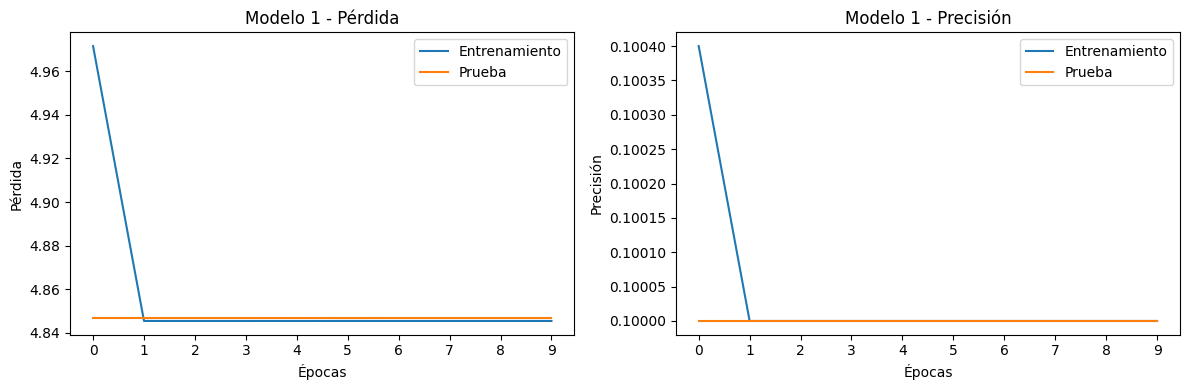

In [14]:
# grafico modelo1

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.lineplot(x=range(len(modelo1.history.history['loss'])), y=modelo1.history.history['loss'], label='Entrenamiento')
sns.lineplot(x=range(len(modelo1.history.history['val_loss'])), y=modelo1.history.history['val_loss'], label='Prueba')
plt.title('Modelo 1 - Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.xticks(range(len(modelo1.history.history['loss'])), range(len(modelo1.history.history['loss'])))


plt.subplot(1, 2, 2)
sns.lineplot(x=range(len(modelo1.history.history['accuracy'])), y=modelo1.history.history['accuracy'], label='Entrenamiento')
sns.lineplot(x=range(len(modelo1.history.history['val_accuracy'])), y=modelo1.history.history['val_accuracy'], label='Prueba')
plt.title('Modelo 1 - Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.xticks(range(len(modelo1.history.history['accuracy'])), range(len(modelo1.history.history['accuracy'])))

plt.tight_layout()
plt.show()

#### Análisis 1:
En el primer modelo, se hizo una arquitectura sin tomar en cuenta el pooling. De esta forma, se experimentó con el modelo con 3 capas convolucionales de 32, 64 y 128. También se está haciendo uso de la función BatchNormalization y una capa densa con 64 neuronas. Al ejecutar esta arquitectura, se obtienen resultados sumamente bajos. Se puede observar que la validación de puntuación se encuentra en un rango cercano a los otros modelos, pero tiene una pérdida mucho mayor. Esto indica un claro sobreajuste y una disminución en el rendimiento general del modelo. La ausencia de maxpooling puede estar afectando la agrupación de las regiones que normalmente se utilizan para identificar características importantes dentro de las imágenes, lo que empeora el rendimiento del entrenamiento.

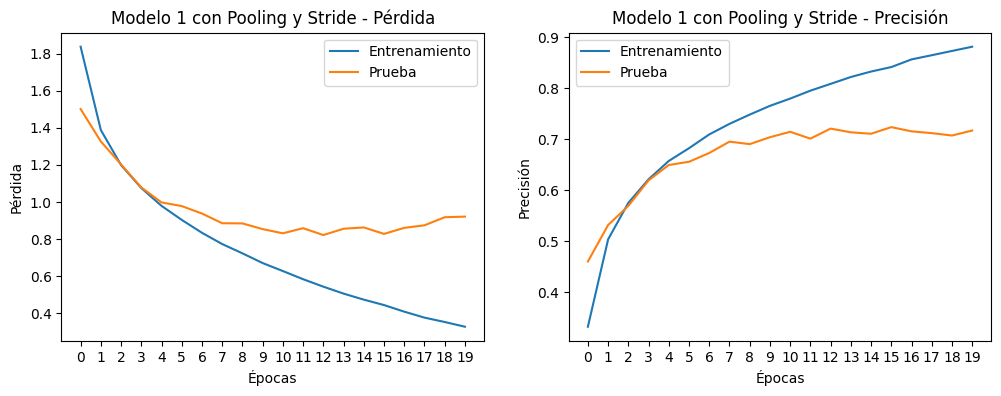

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.lineplot(x=range(len(modelo1ps.history.history['loss'])), y=modelo1ps.history.history['loss'], label='Entrenamiento')
sns.lineplot(x=range(len(modelo1ps.history.history['val_loss'])), y=modelo1ps.history.history['val_loss'], label='Prueba')
plt.title('Modelo 1 con Pooling y Stride - Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.xticks(range(len(modelo1ps.history.history['loss'])), range(len(modelo1ps.history.history['loss'])))

plt.subplot(1, 2, 2)
sns.lineplot(x=range(len(modelo1ps.history.history['accuracy'])), y=modelo1ps.history.history['accuracy'], label='Entrenamiento')
sns.lineplot(x=range(len(modelo1ps.history.history['val_accuracy'])), y=modelo1ps.history.history['val_accuracy'], label='Prueba')
plt.title('Modelo 1 con Pooling y Stride - Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.xticks(range(len(modelo1ps.history.history['accuracy'])), range(len(modelo1ps.history.history['accuracy'])))

plt.show()

#### Análisis 2:
En la siguiente versión se realizaron modificaciones a la arquitectura que beneficiaron satisfactoriamente al modelo. Se empezó por usar 2 capas de MaxPooling2D y se reemplazó BatchNormalization con el uso de Dropout, con un 25% de desactivación de neuronas, para reducir la función de pérdida. Esto logró satisfactoriamente una reducción de la pérdida hasta aproximadamente 0.80 en la validación de pérdida y una precisión de validación del 71% aproximadamente.

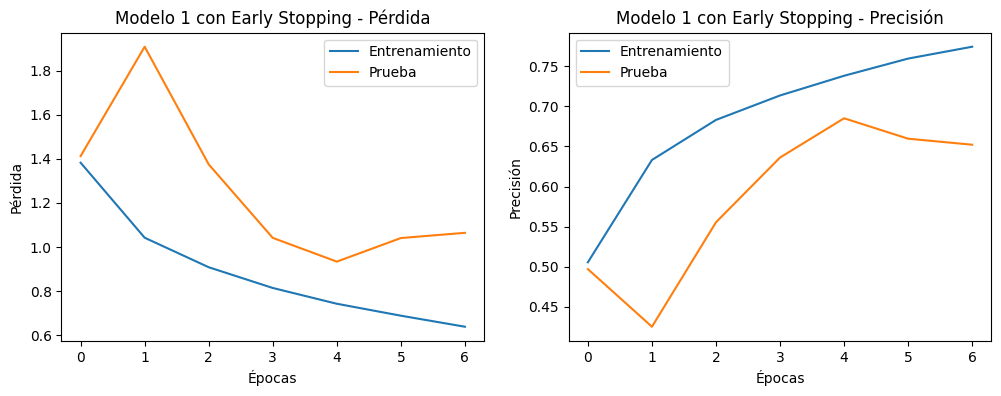

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.lineplot(x=range(len(modelo1es.history.history['loss'])), y=modelo1es.history.history['loss'], label='Entrenamiento')
sns.lineplot(x=range(len(modelo1es.history.history['val_loss'])), y=modelo1es.history.history['val_loss'], label='Prueba')
plt.title('Modelo 1 con Early Stopping - Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.xticks(range(len(modelo1es.history.history['loss'])), range(len(modelo1es.history.history['loss'])))

plt.subplot(1, 2, 2)
sns.lineplot(x=range(len(modelo1es.history.history['accuracy'])), y=modelo1es.history.history['accuracy'], label='Entrenamiento')
sns.lineplot(x=range(len(modelo1es.history.history['val_accuracy'])), y=modelo1es.history.history['val_accuracy'], label='Prueba')
plt.title('Modelo 1 con Early Stopping - Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.xticks(range(len(modelo1es.history.history['accuracy'])), range(len(modelo1es.history.history['accuracy'])))

plt.show()


#### Análisis 3:
Se intentó implementar early stopping. Por este motivo, se utilizó un máximo de 20 épocas y un early stopping con un hiperparámetro de paciencia (patience) de 2 para tener una menor tolerancia a la falta de cambios en el modelo. A pesar de eso, aunque hubo cambios en cosas como el número de filtros durante el entrenamiento, se observó un cambio realmente representativo. Disminuyó la precisión y aumentó la pérdida de manera drastica. Lo primero que podemos observar y la principal razón por la que se piensa que el modelo aumentó en pérdida es el uso de BatchNormalization con un tamaño de lote (batch size) tan grande.

313/313 [==============================] - 1s 3ms/step


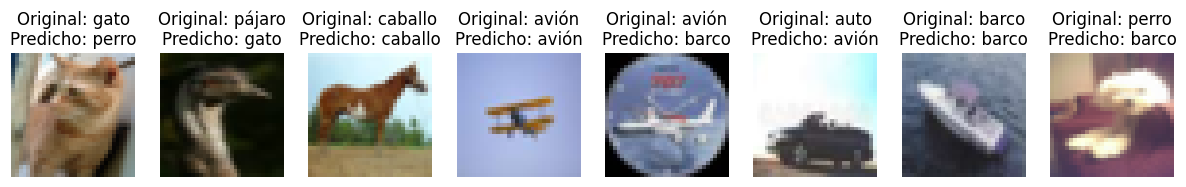

In [ ]:
predicciones = modelo1ps.predict(X_test)

indices_ejemplos = random.sample(range(len(imgs_test)), 8)

fig, axs = plt.subplots(1, 8, figsize=(15, 3))

for i in range(8):
    indice = indices_ejemplos[i]
    imagen = imgs_test[indice]
    nombre_original = nombres[labs_test[indice][0]]
    nombre_predicho = nombres[np.argmax(predicciones[indice])]

    axs[i].imshow(imagen)
    axs[i].set_title(f'Original: {nombre_original}\nPredicho: {nombre_predicho}')
    axs[i].axis('off')

plt.show()

### Modelo 2

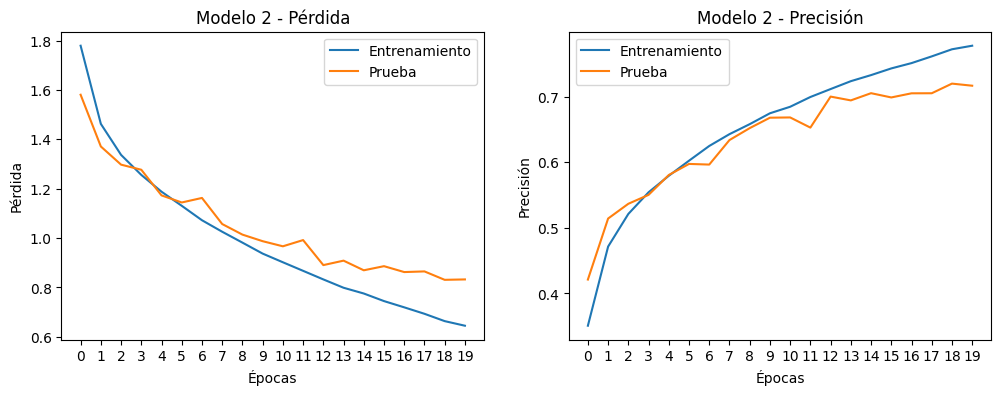

In [ ]:
# Gráfico para el modelo2
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.lineplot(x=range(len(modelo2.history.history['loss'])), y=modelo2.history.history['loss'], label='Entrenamiento')
sns.lineplot(x=range(len(modelo2.history.history['val_loss'])), y=modelo2.history.history['val_loss'], label='Prueba')
plt.title('Modelo 2 - Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.xticks(range(len(modelo2.history.history['loss'])), range(len(modelo2.history.history['loss'])))

plt.subplot(1, 2, 2)
sns.lineplot(x=range(len(modelo2.history.history['accuracy'])), y=modelo2.history.history['accuracy'], label='Entrenamiento')
sns.lineplot(x=range(len(modelo2.history.history['val_accuracy'])), y=modelo2.history.history['val_accuracy'], label='Prueba')
plt.title('Modelo 2 - Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.xticks(range(len(modelo2.history.history['accuracy'])), range(len(modelo2.history.history['accuracy'])))

plt.show()

#### Analisis 1:
En el modelo anterior se cambió el optimizador para probar un optimizador adaptativo dentro de la arquitectura, en este caso Adamax. Adamax puede ser más efectivo que SGD en términos de convergencia rápida, mejorando ligeramente el problema de estabilidad que se observa en las evaluaciones. Incluso sin tener que alterar los parámetros del optimizador y retirando Dropout, se lograron resultados casi iguales a los de SGD, pero de una forma más optimizada y con una arquitectura más simple y un entrenamiento más estable. Este modelo muestra un mayor potencial de generalización.

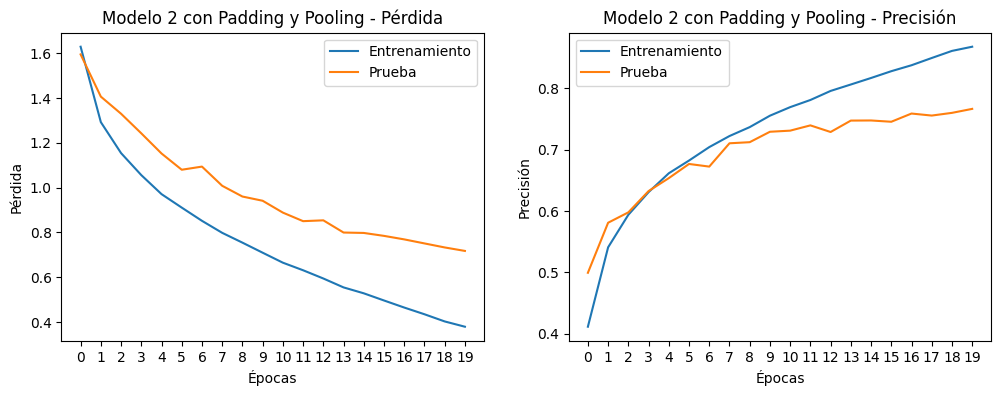

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.lineplot(x=range(len(modelo2pd.history.history['loss'])), y=modelo2pd.history.history['loss'], label='Entrenamiento')
sns.lineplot(x=range(len(modelo2pd.history.history['val_loss'])), y=modelo2pd.history.history['val_loss'], label='Prueba')
plt.title('Modelo 2 con Padding y Pooling - Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.xticks(range(len(modelo2pd.history.history['loss'])), range(len(modelo2pd.history.history['loss'])))

plt.subplot(1, 2, 2)
sns.lineplot(x=range(len(modelo2pd.history.history['accuracy'])), y=modelo2pd.history.history['accuracy'], label='Entrenamiento')
sns.lineplot(x=range(len(modelo2pd.history.history['val_accuracy'])), y=modelo2pd.history.history['val_accuracy'], label='Prueba')
plt.title('Modelo 2 con Padding y Pooling - Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.xticks(range(len(modelo2pd.history.history['accuracy'])), range(len(modelo2pd.history.history['accuracy'])))

plt.show()


#### Analisis 2:
En el siguiente modelo, se modifico la arquitectura del modelo 2 intenta aplicar padding a todas las capas convolucionales, se aumento el numero de neuronas y se agrego 3 capas ocultas de dropout y una nueva de MaxPooling. Esto significo una mejora relevante tanto en el aumento de precision como en la disminucion de la perdida, logrando mejorar el modelo tanto en generalizacion como en rendimiento. Siendo que una

313/313 [==============================] - 1s 2ms/step


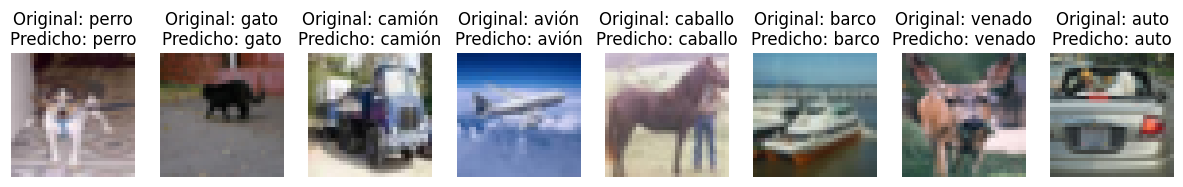

In [ ]:
predicciones = modelo2pd.predict(X_test)

indices_ejemplos = random.sample(range(len(imgs_test)), 8)

fig, axs = plt.subplots(1, 8, figsize=(15, 3))

for i in range(8):
    indice = indices_ejemplos[i]
    imagen = imgs_test[indice]
    nombre_original = nombres[labs_test[indice][0]]
    nombre_predicho = nombres[np.argmax(predicciones[indice])]

    axs[i].imshow(imagen)
    axs[i].set_title(f'Original: {nombre_original}\nPredicho: {nombre_predicho}')
    axs[i].axis('off')

plt.show()

# Despliegue

Aquí se muestra una cuadrícula utilizando como base el mejor modelo en función de las evaluaciones, en este caso el modelo sería el modelo 2. Sin embargo, debido a la baja precisión del modelo, no sería recomendable ponerlo en producción.

313/313 [==============================] - 1s 2ms/step


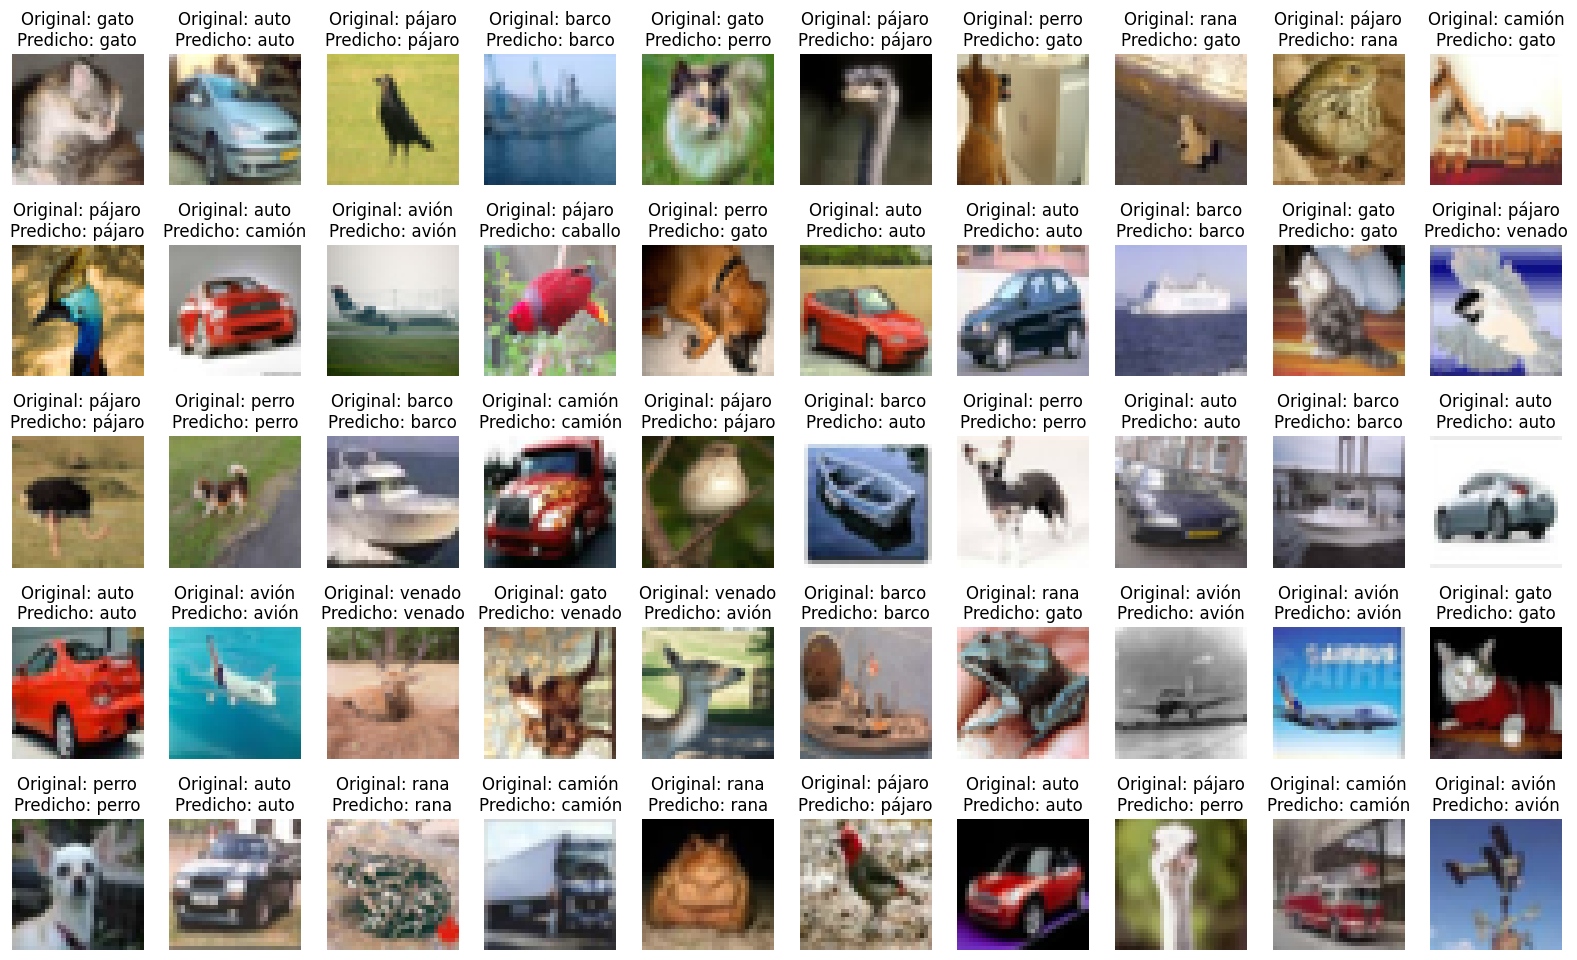

In [ ]:
predicciones = modelo2pd.predict(X_test)

indices_ejemplos = random.sample(range(len(imgs_test)), h*w)

fig, axs = plt.subplots(h, w, figsize=(w+10, h+7))

for i in range(h):
    for j in range(w):
        indice = indices_ejemplos[i*w+j]
        imagen = imgs_test[indice]
        nombre_original = nombres[labs_test[indice][0]]
        nombre_predicho = nombres[np.argmax(predicciones[indice])]

        axs[i,j].imshow(imagen)
        axs[i,j].set_title(f'Original: {nombre_original}\nPredicho: {nombre_predicho}')
        axs[i,j].axis('off')

plt.show()
